In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("data_stocks.csv")

In [46]:
def smoothing (vec , n):
    k = len (vec)
    mvec = np.zeros (k-n+1)
    for i in range(k-n+1):
        mvec[i] = np.mean (vec[i:i+n-1])
    return mvec

def smoothedCurve (name , n=500):
    original = df["NASDAQ." + name].values
    smoothed = smoothing (original, n)
    return smoothed

def smoothingPlot (name,n=500):   
    original = df["NASDAQ." + name].values
    smoothed = smoothedCurve (name,n)
    plt.figure(figsize=(16,8))
    plt.plot(range(len(original)),original)
    plt.plot(range(len(smoothed)) + n*np.ones(len(smoothed)) , smoothed)


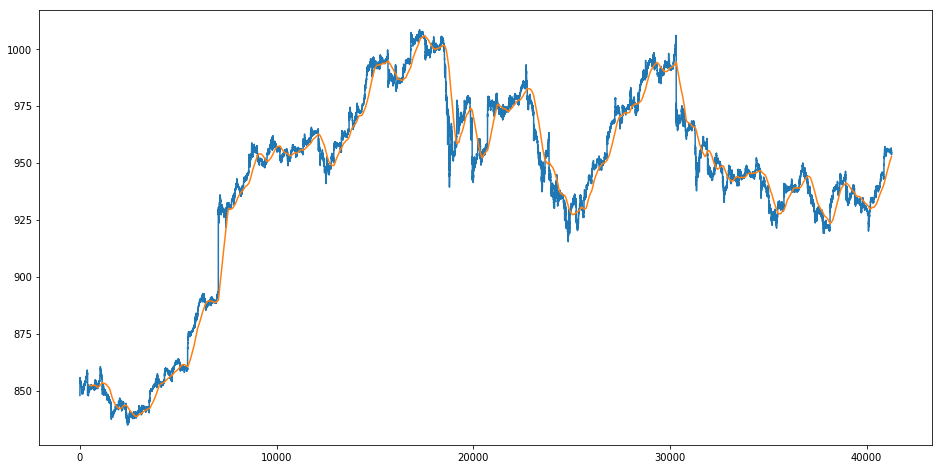

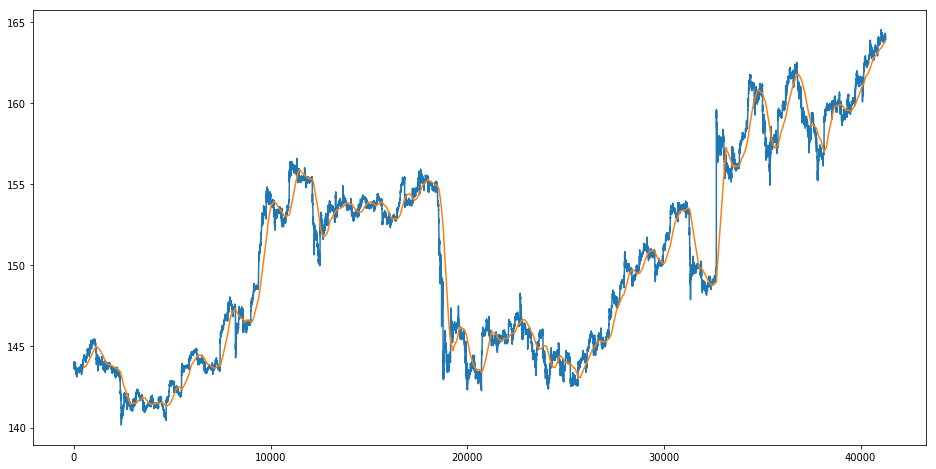

In [48]:
smoothingPlot("GOOGL")
smoothingPlot("AAPL")

In [60]:
def slidingCorrelationPlot (name1 , name2 , n=500 , k = 5000):

    original1 = df["NASDAQ." + name1].values
    smoothed1 = smoothedCurve (name1,n)
    
    original2 = df["NASDAQ." + name2].values
    smoothed2 = smoothedCurve (name2,n)

    l = len (smoothed1)
    #l = len (original1)
    
    corrVec = np.zeros (l-k+1)
    for i in range(len(corrVec)):
        corrVec[i] = np.corrcoef (smoothed1 [i:i+k-1] , smoothed2 [i:i+k-1])[0][1]
        #corrVec[i] = np.corrcoef (original1 [i:i+k-1] , original2 [i:i+k-1])[0][1]

    plt.figure(figsize=(16,8))
    plt.plot(corrVec)

    #plt.figure(figsize=(16,8))
    #plt.plot(smoothed1)
    
    #plt.figure(figsize=(16,8))
    #plt.plot(smoothed2)

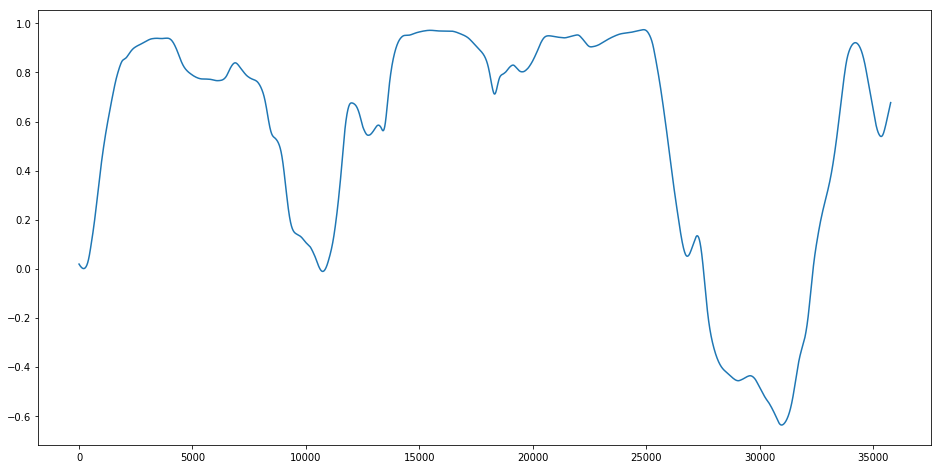

In [61]:
slidingCorrelationPlot ("AAPL" , "GOOGL")

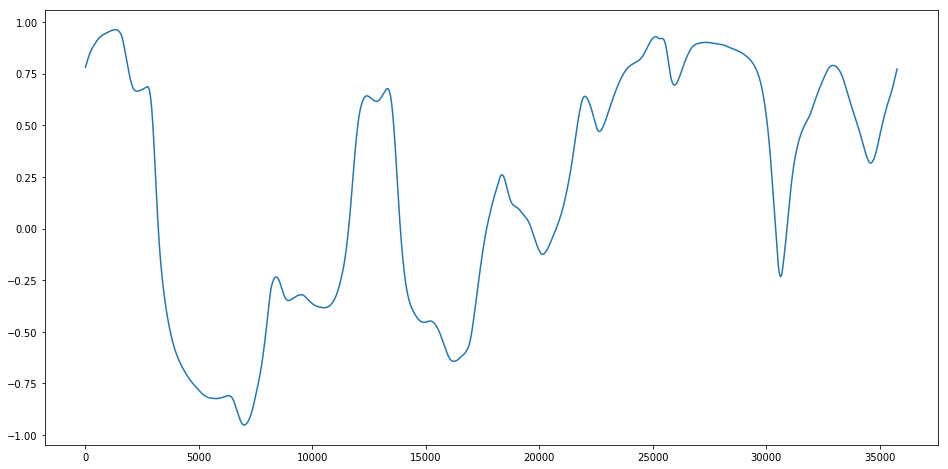

In [65]:
slidingCorrelationPlot ("AKAM" , "GOOGL")

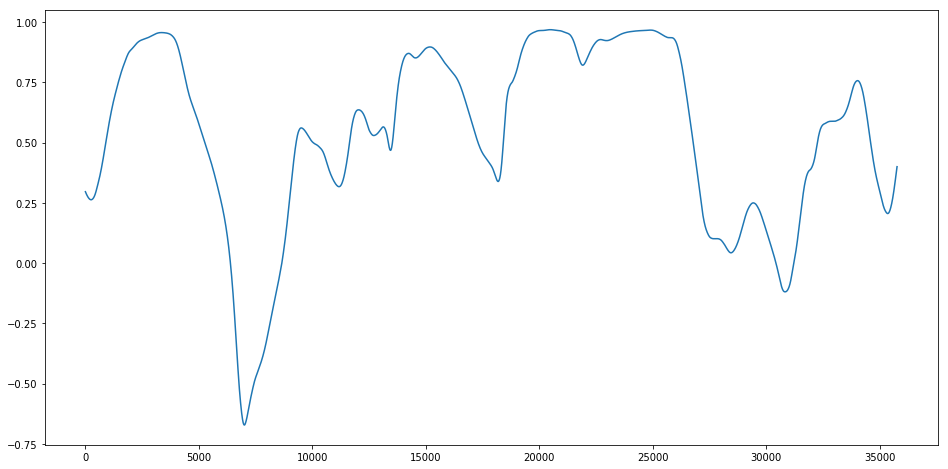

In [55]:
slidingCorrelationPlot ("FB" , "AAPL")

In [64]:
df.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)